# Shopping Customer Segmentation

## Table of Contents:

- Introduction
- Exploratory Data Analysis (EDA)
- Model Development (KMeans Clustering)
- Data Visualization
- Conclusion and Recommendations


## Introduction:

**Problem Statement**: A marketing team needs to understand the target customers better to develop effective marketing strategies. Currently, there's limited insight into the key customer segments within the mall customer dataset. Identifying distinct customer groups based on demographics and purchasing behavior is crucial for developing marketing efforts and optimizing customer engagement.

**Project Objective**: The objective of this project is to perform customer segmentation using an unsupervised machine learning technique, KMeans clustering, on the mall customer dataset. By dividing the customer base into meaningful segments based on demographic and behavioral characteristics, the project identifies target groups for marketing campaigns. This analysis will help inform strategic decisions and improve customer satisfaction and retention.

**About the Dataset**: The dataset consists of entries representing customers of a mall. It contains the following features:
- **CustomerID**: Unique identifier for each customer
- **Gender**: Gender of the customer
- **Age**: Age of the customer
- **Annual Income (k$)**: Annual income of the customer in thousands
- **Spending Score (1-100)**: Score assigned by the mall based on customer spending behavior and purchasing patterns

## Exploratory Data Analysis (EDA):
01. Univariate Analysis
02. Bivariate Analysis

In [ ]:
# Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importing csv file
mallcustomer_df = pd.read_csv("/content/Mall_Customers.csv")
mallcustomer_df.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [ ]:
# Displaying summary:
mallcustomer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
# Displaying descriptive statistics:
mallcustomer_df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Descriptive Statistics Summary:
- **Avg. Age**: 39 (range: 18-70)
- **Avg. Income**: 60K (range: 15K-137K)
- **Avg. Spending Score**: 50/100
- Mean and median values are close, indicating near-normal distributions and minimal skewness


### 1. Univariate Analysis
- Histograms
- KDE Plots
- Box Plots

In [ ]:
# Defining features to plot
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

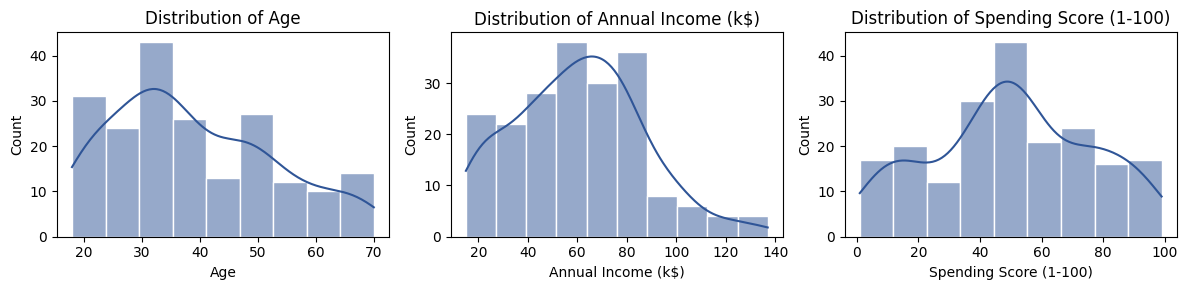

In [ ]:
# Creating histograms with kde to understand the distribution of key features
fig, axes = plt.subplots(1, len(features), figsize=(12, 3))

for ax_i, feat_i in zip(axes, features):
    sns.histplot(mallcustomer_df, x=feat_i, kde=True, ax=ax_i, color='#2F5597', edgecolor='white')
    ax_i.set_title(f'Distribution of {feat_i}')

plt.tight_layout()
plt.show()

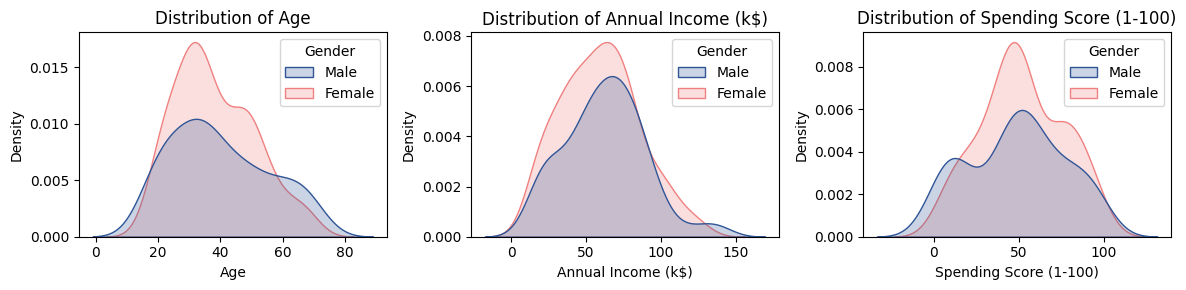

In [ ]:
# Creating KDE plots to understand the distribution of key features by gender
custom_palette = {'Male': '#2F5597', 'Female': 'lightcoral'}

fig, axes = plt.subplots(1, len(features), figsize=(12, 3))

for ax_i, feat_i in zip(axes, features):
    sns.kdeplot(data=mallcustomer_df, x=feat_i, hue='Gender', fill=True, ax=ax_i, palette=custom_palette)
    ax_i.set_title(f'Distribution of {feat_i}')

plt.tight_layout()
plt.show()

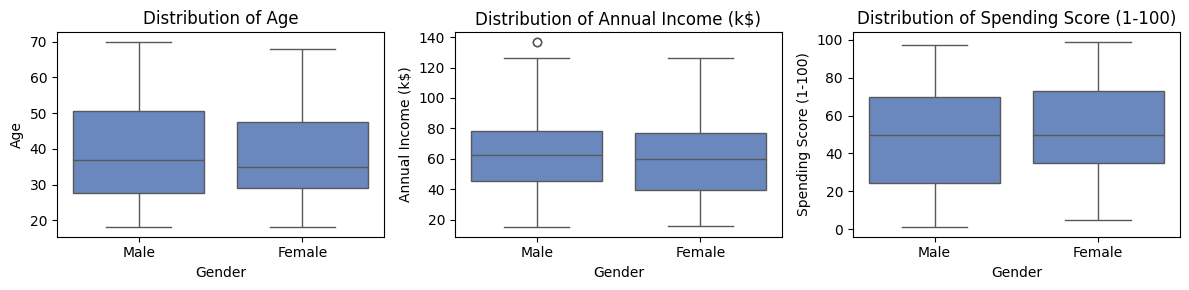

In [ ]:
# Creating box plots to compare feature distributions by gender and identify outliers
fig, axes = plt.subplots(1, len(features), figsize=(12, 3))

for ax_i, feat_i in zip(axes, features):
  sns.boxplot(data=mallcustomer_df, x="Gender", y=feat_i, ax=ax_i, color='#5C84CC')
  ax_i.set_title(f'Distribution of {feat_i}')

plt.tight_layout()
plt.show()

In [ ]:
# Calculating the count, proportion, and mean values for all key features by gender
gender_count = mallcustomer_df['Gender'].value_counts()
gender_percent = mallcustomer_df['Gender'].value_counts(normalize=True) * 100
gender_means = mallcustomer_df.groupby(['Gender'])[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

gender_df = pd.DataFrame({'Count': gender_count, 'Percentage': gender_percent}).join(gender_means)

gender_df

,Count,Percentage,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,,,
Female,112,56.0,38.098214,59.250000,51.526786
Male,88,44.0,39.806818,62.227273,48.511364


Univariate Analysis Summary:
- **Histograms**: Age distribution is somewhat uniform, with a peak in the 30s and a notable drop beyond 50. Annual income is right-skewed, with in most earning 40k-80k and few above 100k. Spending scores roughly follow a normal distribution, indicating that most customers have moderate spending scores, with fewer customers having extremely low/high scores.
- **KDE Plots**: The visuals show higher density peaks in the feature distributions for females. This higher concentration of values suggests that females tend to cluster more closely around specific values compared to males. The larger area under the curves for females indicates a higher number/representation in the dataset, supported by gender_df output showing 56% females and 44% males. The fat tail on the right side of the annual income graph for males shows the presence of high-income outliers.
- **Box Plots**: The median age is slightly higher for males, and they show more age variability. Males also have a slightly higher median income, but females have more income variability. An outlier for high-income males confirms the observation noted in the KDE plot. Females have slightly higher median spending scores. They also tend to spend more overall, as shown by the higher ranges in the upper and lower bounds of the box plot.



### 2. Bivariate Analysis
- Pair Plot
- Pair Plot w/ Gender
- Correlation Heat Map
- Scatterplot

In [ ]:
# Creating a copy of the original df for EDA and dropping CustomerID as it is a unique id column, not useful for visualization
mallcustomer_df_eda = mallcustomer_df.copy()
mallcustomer_df_eda = mallcustomer_df_eda.drop('CustomerID', axis=1)

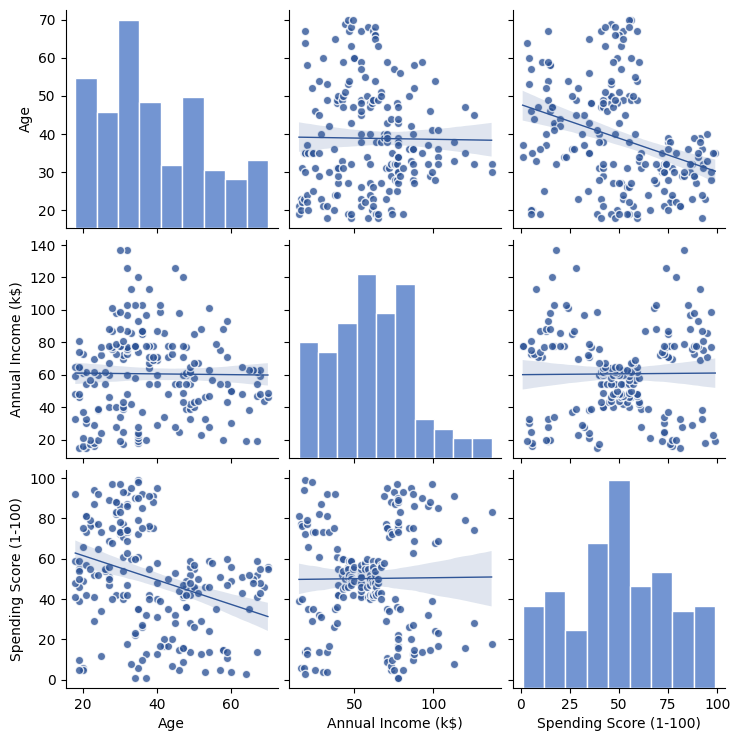

In [ ]:
# Creating a pair plot to visualize relationships between features
sns.pairplot(data=mallcustomer_df_eda, kind="reg",
             plot_kws={'line_kws': {'linewidth': 1, 'color': '#2F5597'}, 'scatter_kws': {'edgecolor': 'white', 'color': '#2F5597'}},
             diag_kws={'color': '#4472C4', 'edgecolor': 'white'});

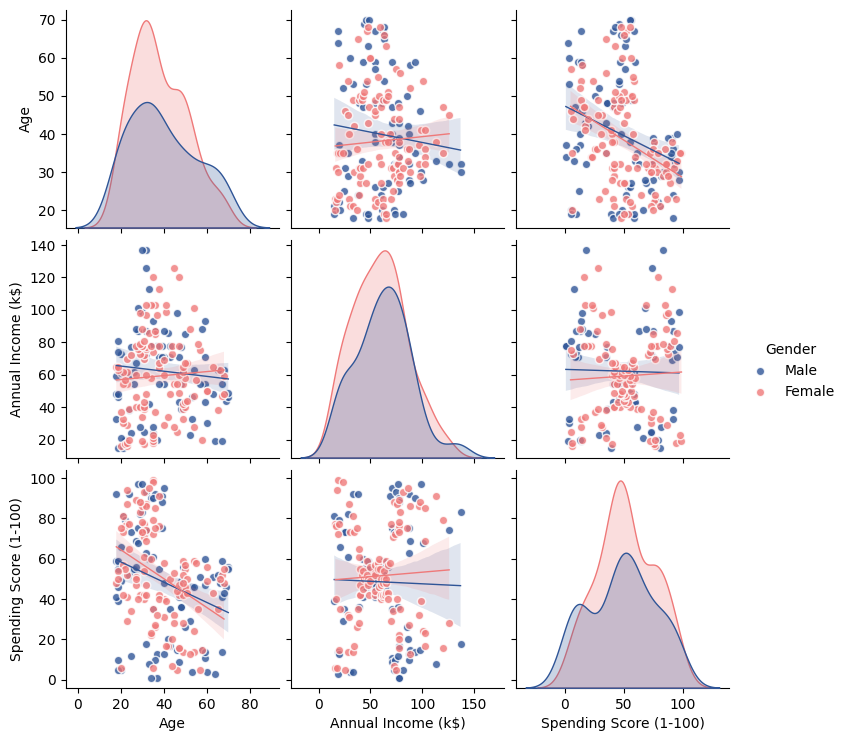

In [ ]:
# Creating a pair plot to visualize relationships between features, differentiated by gender
custom_palette = {'Male': '#2F5597', 'Female': '#EF7979'}

sns.pairplot(mallcustomer_df_eda, hue='Gender', kind="reg", palette=custom_palette,
             plot_kws={'line_kws': {'linewidth': 1}, 'scatter_kws': {'edgecolor': 'white'}},
             diag_kws={'color': '#2F5597'});

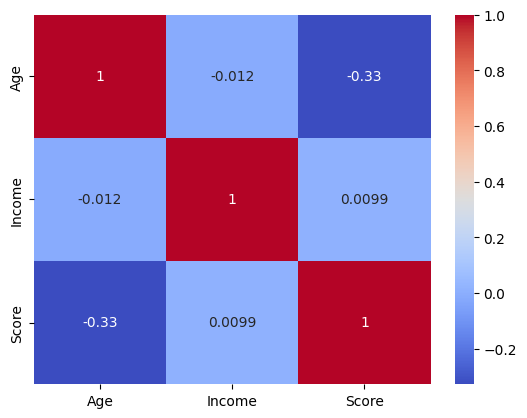

In [ ]:
# Creating a correlation heatmap to show correlation between features
corr_matrix = mallcustomer_df_eda[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', xticklabels=['Age', 'Income', 'Score'], yticklabels=['Age', 'Income', 'Score']);

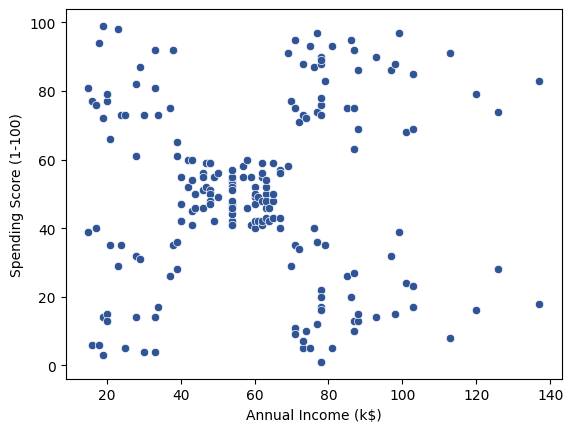

In [ ]:
# Creating a scatter plot to visualize the relationship between annual income and spending score
sns.scatterplot(data=mallcustomer_df_eda, x='Annual Income (k$)', y='Spending Score (1-100)', color='#2F5597');

Bivariate Analysis Summary:
- **Pair Plot**: No strong relationship is observed between age and income. This suggests that age has minimal impact on annual income. A negative relationship is displayed between age and spending score, indicating that customers tend to spend less money as they get older. There is a noticeable grouping pattern that suggests the presence of five distinct clusters between spending and income. These groupings suggest that there may be natural segments within the data, useful for customer segmentation and target marketing strategies.  
- **Pair Plot w/ Gender**: The regression line for males shows a negative slope for age and income, while the line for females shows a positive slope. This means that as males age, their income tends to decrease, while for females, it increases slightly. For age and spending score, both regression lines have a negative slope, with the line for females being steeper. This indicates that female spending decreases more sharply with age than male spending. For income and spending score, the five segments seen in the previous pair plot are still present, drawing attention to the need to explore these groupings for better customer segmentation.
- **Correlation Heat Map**: The output from this visual aligns with the trends extracted from the pair plot's regression lines. The correlation coefficients show relatively low numbers, suggesting weak relationships between features.
- **Scatterplot**: I plotted this scatterplot on its own to drill down on the pair plot and further explore the five segments observed in the spending score and annual income plot. These groupings indicate distinct clusters of customers with varying income and spending behaviors. Here is the description of each observed segment:
  - **Top Left**: Low income, high spending
  - **Top Right**: High income, high spending
  - **Middle**: Moderate income, moderate spending
  - **Bottom Left**: Low income, low spending
  - **Bottom Right**: High income, low spending

## Model Development (KMeans Clustering):
1. Initialization and Fitting
2. Inertia and Elbow Method
3. Cluster Labeling

In [ ]:
# Creating a copy of the original df for model building
mallcustomer_df_mb = mallcustomer_df.copy()

### 1. Initialization and Fitting

In [ ]:
# Initiating KMeans clustering model
mallcustomer_cluster = KMeans()

# Fitting the model to annual income & spending score columns to form clusters based on these features
mallcustomer_cluster.fit(mallcustomer_df_mb[['Annual Income (k$)','Spending Score (1-100)']])

KMeans()

### 2. Inertia and Elbow Method

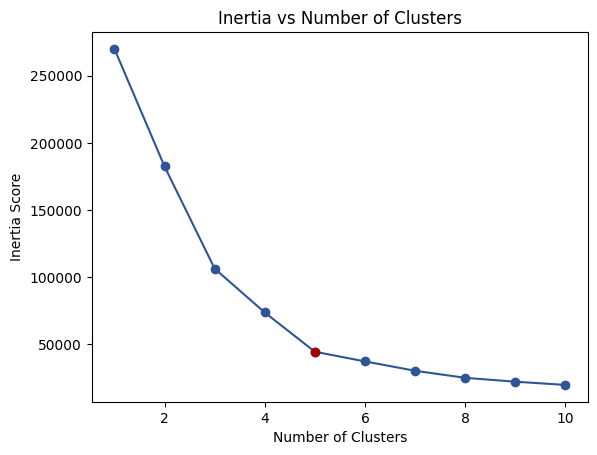

In [ ]:
# Finding the ideal number of clusters using the inertia and elbow method

# Initializing an empty list to store inertia scores for different numbers of clusters
inertia_scores=[]

# Looping through a range of cluster numbers from 1 to 10 to calculate the inertia scores for each cluster count
for range_i in range (1,11):
  kmeans_model=KMeans(n_clusters=range_i)
  kmeans_model.fit(mallcustomer_df_mb[['Annual Income (k$)','Spending Score (1-100)']])
  inertia_scores.append(kmeans_model.inertia_)

# Plotting the inertia scores against the number of clusters to visualize the elbow method
plt.plot(range(1,11), inertia_scores, marker='o', color='#2F5597')
plt.title('Inertia vs Number of Clusters')
plt.scatter(5, inertia_scores[4], color='#A40000', zorder=5)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia Score');

### 3. Cluster Labeling

In [ ]:
# Re-initializing and fitting the KMeans model with the optimal number of clusters determined by the elbow method
mallcustomer_cluster = KMeans(n_clusters=5)
mallcustomer_cluster.fit(mallcustomer_df_mb[['Annual Income (k$)','Spending Score (1-100)']])

# Assigning numeric cluster labels to a new column in the dataframe
mallcustomer_df_mb['Spending and Income Cluster'] = mallcustomer_cluster.labels_

# Assigning text cluster labels to a new column in the dataframe
cluster_labels = {
    0: 'Avg Income, Avg Spending',
    1: 'High Income, High Spending',
    2: 'Low Income, High Spending',
    3: 'High Income, Low Spending',
    4: 'Low Income, Low Spending'
}
mallcustomer_df_mb['Cluster Label'] = mallcustomer_df_mb['Spending and Income Cluster'].map(cluster_labels)

mallcustomer_df_mb.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Spending and Income Cluster,Cluster Label
0,1,Male,19,15,39,4,"Low Income, Low Spending"
1,2,Male,21,15,81,2,"Low Income, High Spending"
2,3,Female,20,16,6,4,"Low Income, Low Spending"


## Data Visualization:
1. Visualizing Cluster Distribution
2. Analyzing Cluster Statistics

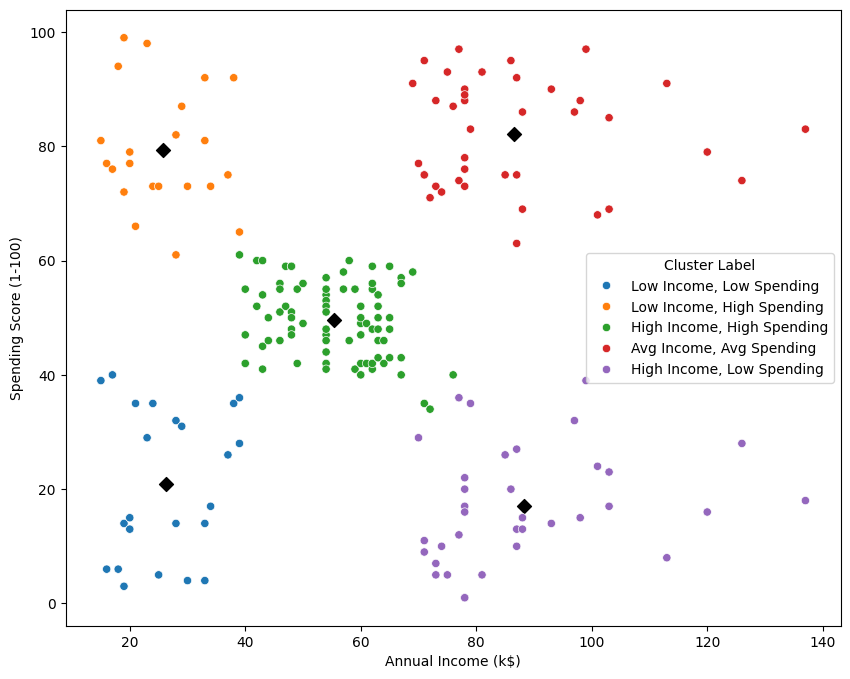

In [ ]:
# Creating a scatter plot to visualize cluster centers and distributions
centers = pd.DataFrame(mallcustomer_cluster.cluster_centers_)
centers.columns = ['x','y']

plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'], y=centers['y'], s=50, c='black', marker = 'D')
sns.scatterplot(data=mallcustomer_df_mb, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster Label',palette='tab10');

In [ ]:
# Calculating the count, key metric mean, and gender distribution of each annual income cluster
cluster_counts = mallcustomer_df_mb['Cluster Label'].value_counts().sort_index()
cluster_means = mallcustomer_df_mb.groupby('Cluster Label')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
gender_distribution = pd.crosstab(mallcustomer_df_mb['Cluster Label'], mallcustomer_df_mb['Gender'], normalize='index')

cluster_df = pd.concat([cluster_counts, cluster_means, gender_distribution], axis=1)
cluster_df.columns = ['Count', 'Mean: Age', 'Mean: Annual Income (k$)', 'Mean: Spending Score (1-100)', 'Male Proportion', 'Female Proportion']

cluster_df

,Count,Mean: Age,Mean: Annual Income (k$),Mean: Spending Score (1-100),Male Proportion,Female Proportion
Cluster Label,,,,,,
"Avg Income, Avg Spending",39,32.692308,86.538462,82.128205,0.538462,0.461538
"High Income, High Spending",81,42.716049,55.296296,49.518519,0.592593,0.407407
"High Income, Low Spending",35,41.114286,88.200000,17.114286,0.457143,0.542857
"Low Income, High Spending",22,25.272727,25.727273,79.363636,0.590909,0.409091
"Low Income, Low Spending",23,45.217391,26.304348,20.913043,0.608696,0.391304


## Conclusion and Recommendations:
- Key Findings
- Marketing Strategy Recommendations

### Key Findings
From the KMeans Clustering, I identified five distinct clusters within the mall customer dataset:
- **Avg Income, Avg Spending**: Consists of customers with moderate income and spending habits, forming the largest group
- **High Income, High Spending**: Includes high-income, high-spending customers
- **Low Income, High Spending**: Features customers with low income but high spending scores, suggesting they prioritize shopping despite lower earnings
- **High Income, Low Spending**: Made up of high-income, low-spending customers, possibly indicating a focus on saving
- **Low Income, Low Spending**: Includes those with both low income and low spending scores

Younger customers tend to spend more, as seen in clusters with higher spending scores. High spenders are typically younger, as shown by the **Low Income, High Spending** cluster, with an average age of 25 years. On the other hand, older customers spend less, as indicated by the higher average ages in clusters with lower spending scores. For example, the **High Income, Low Spending** cluster has an average age of 41, and the **Low Income, Low Spending** cluster has an average age of 45.

### Marketing Strategy Recommendations
To effectively target each customer cluster, specific strategies should be employed:
- For the **High Income, High Spending** segment, design premium loyalty programs and exclusive offers to attract and retain this lucrative group.
- For **Low Income, High Spending** customers, introduce discounts, installment payment options, or cashback offers to incentivize spending while considering their lower income levels.
- The **High Income, Low Spending** cluster should be targeted with promotions for savings accounts, investment opportunities, and high-end products that align with their saving behavior, highlighting the long-term benefits of investing in higher-value items.
- For **Low Income, Low Spending** customers, focus on value-for-money products and basic necessity items, implementing loyalty programs that reward frequent small purchases to build customer loyalty.
- For the **Avg Income, Avg Spending** group, maintain loyalty through consistent value and satisfaction. Use feedback to understand their needs, offer personalized recommendations, and provide moderate rewards. Gradually increase their spending with new products and seasonal promotions.

Additionally, younger customers, especially in the **High Income, High Spending** and **Low Income, High Spending** clusters, respond well to trendy and personalized marketing. Utilize social media campaigns, influencer partnerships, and mobile-friendly shopping experiences to connect with this tech-savvy audience.